# CardioHealth Risk Assessment Dataset

# Table of Contents

1. [Introduction](#introduction)
2. [Importing Libraries and Loading Data](#importing-libraries-and-loading-data)
3. [Dataframe Exploration](#dataframe-exploration)
4. [Visualizing Data](#visualizing-data)
5. [Machine Learning Model](#machine-learning-model)
    1. [Preprocessing](#preprocessing-data)
    2. [Training and Evaluation](#model-training-and-evaluation)
    3. [Feature Importance](#feature-importance)


## Introduction

The CardioHealth Risk Assessment Dataset contains detailed medical and demographic information from patients, such as age, cholesterol levels, blood pressure, and lifestyle factors. It is designed for developing and testing machine learning models to predict the risk of heart disease, providing a valuable resource for improving diagnostic accuracy and patient outcomes in cardiovascular health.

### Dataset Overview

**General Information:**
- **Total Entries:** 270
- **Total Columns:** 14

**Column Details:**
- **Age:** Age of the patient
- **Sex:** Gender of the patient (0 = Female, 1 = Male)
- **Chest Pain Type:** Type of chest pain (values 1-4)
- **BP:** Blood pressure
- **Cholesterol:** Cholesterol level
- **FBS over 120:** Fasting blood sugar > 120 mg/dl (0 = False, 1 = True)
- **EKG Results:** Electrocardiographic test results (values 0-2)
- **Max HR:** Maximum heart rate achieved
- **Exercise Angina:** Exercise-induced angina (0 = No, 1 = Yes)
- **ST Depression:** ST depression induced by exercise relative to rest
- **Slope of ST:** Slope of the peak exercise ST segment (values 1-3)
- **Number of Vessels Fluro:** Number of major vessels colored by fluoroscopy (values 0-3)
- **Thallium:** Thallium stress test result (values 3, 6, 7)
- **Heart Disease:** Presence or absence of heart disease (Presence, Absence)

This dataset is ideal for building predictive models and conducting exploratory data analysis to understand the factors contributing to heart disease. The following sections will guide you through the process of loading, exploring, preprocessing, and analyzing this data to create an effective machine learning model.


## Importing Libraries and Loading Data

In [1]:
# Basic Libraries
import pandas as pd
import warnings

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

## Dataframe Exploration

In [3]:
print("DataFrame Shape: ", df.shape)
df.head()

DataFrame Shape:  (270, 14)


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
print("---------- DataFrame Info ----------")
df.info()

---------- DataFrame Info ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    ob

In [5]:
print("---------- DataFrame Descriptive Statistics ----------")
df.describe()

---------- DataFrame Descriptive Statistics ----------


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.077778,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.201052,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,47.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,54.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,60.750000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,80.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


### Exploration Summary

- **No missing values**: The dataset contains no null values.

### Noteworthy Statistics:
- **Age**:
  - The average age of the patients is 54.08 years.
  - The age ranges from 29 to 80 years.

- **Cholesterol**:
  - The mean cholesterol level is 249.66 mg/dl, which is relatively high.
  - The cholesterol levels range from 126 to 564 mg/dl.

- **BP (Blood Pressure)**:
  - The mean blood pressure is 131.34 mm Hg, slightly elevated from the normal range.
  - The blood pressure ranges from 94 to 200 mm Hg.

- **Max HR (Maximum Heart Rate Achieved)**:
  - The average maximum heart rate is 149.68 bpm.
  - The maximum heart rate ranges from 71 to 202 bpm.

- **ST Depression**:
  - The mean ST depression is 1.05 mm.
  - The ST depression ranges from 0 to 6.2 mm.

- **Sex**:
  - The dataset is skewed towards male patients, with 68% of the patients being male (sex = 1).

- **Chest Pain Type**:
  - The average value for chest pain type is 3.17, indicating a higher occurrence of atypical angina and non-anginal pain types.

- **Exercise Angina**:
  - Approximately 33% of the patients experience exercise-induced angina.


## Visualizing Data

### Correlation Heatmap

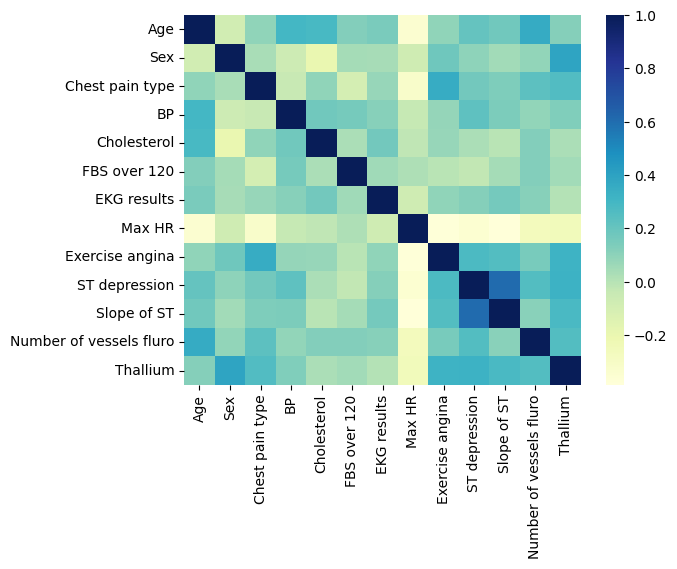

In [6]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu")
plt.show()

- **ST depression** and **Max HR** have a noticeable negative correlation, indicating that as the maximum heart rate achieved increases, the ST depression tends to decrease.

- **Number of vessels fluro** shows a significant correlation with other features, such as **ST depression** and **Exercise angina**.

- Overall, the features do not exhibit very strong correlations with each other, which is good as it indicates low multicollinearity.


### Histograms

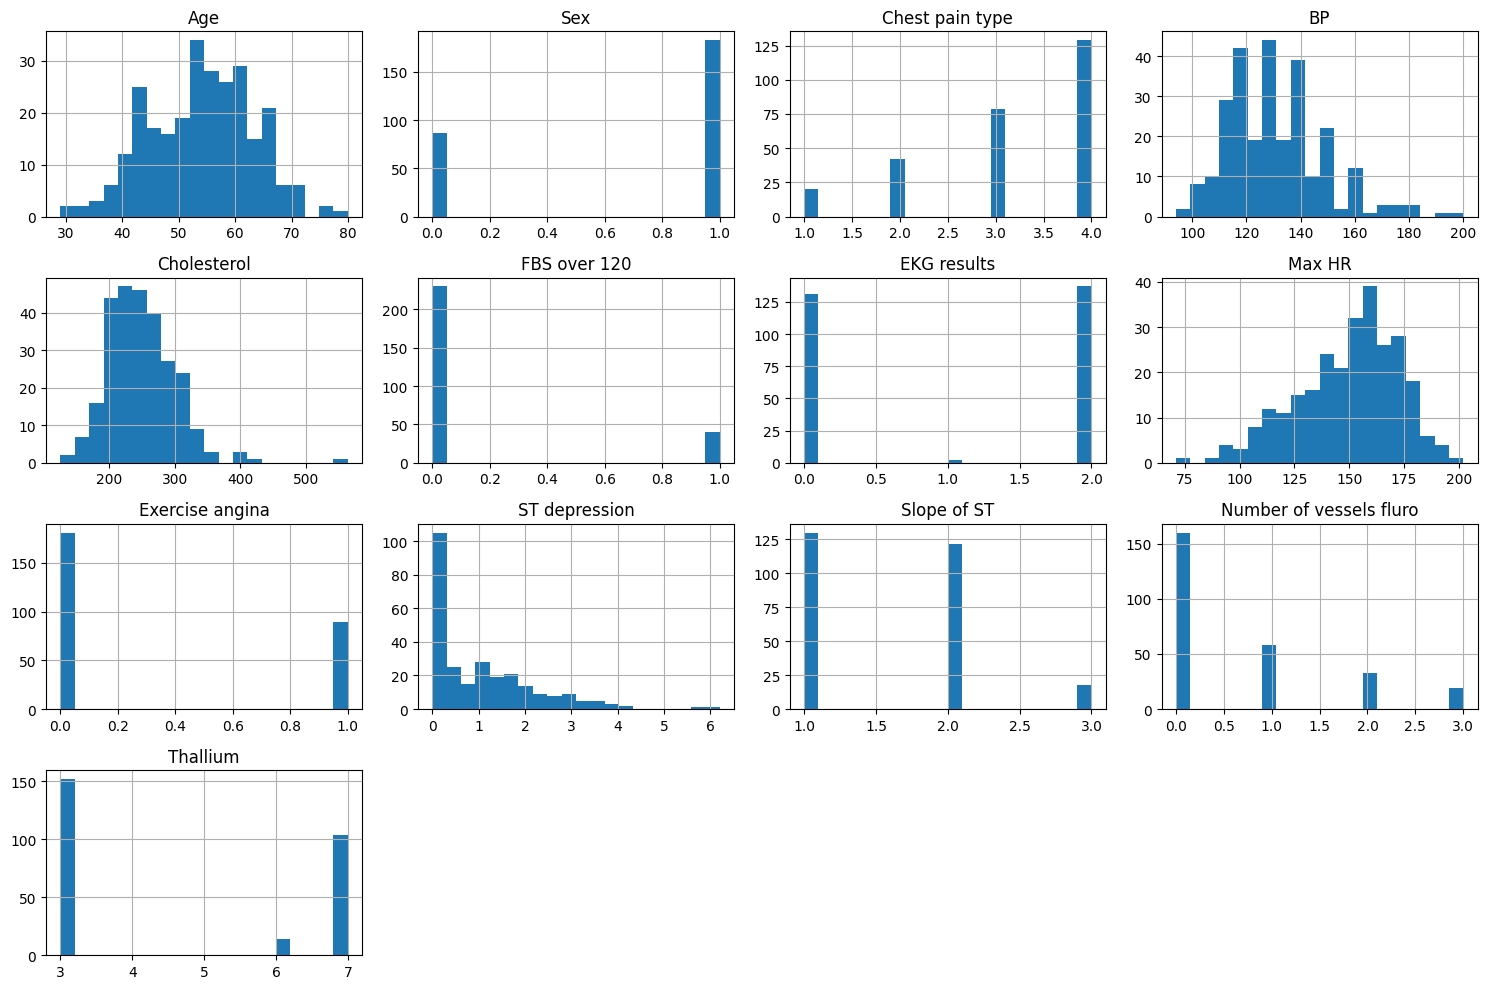

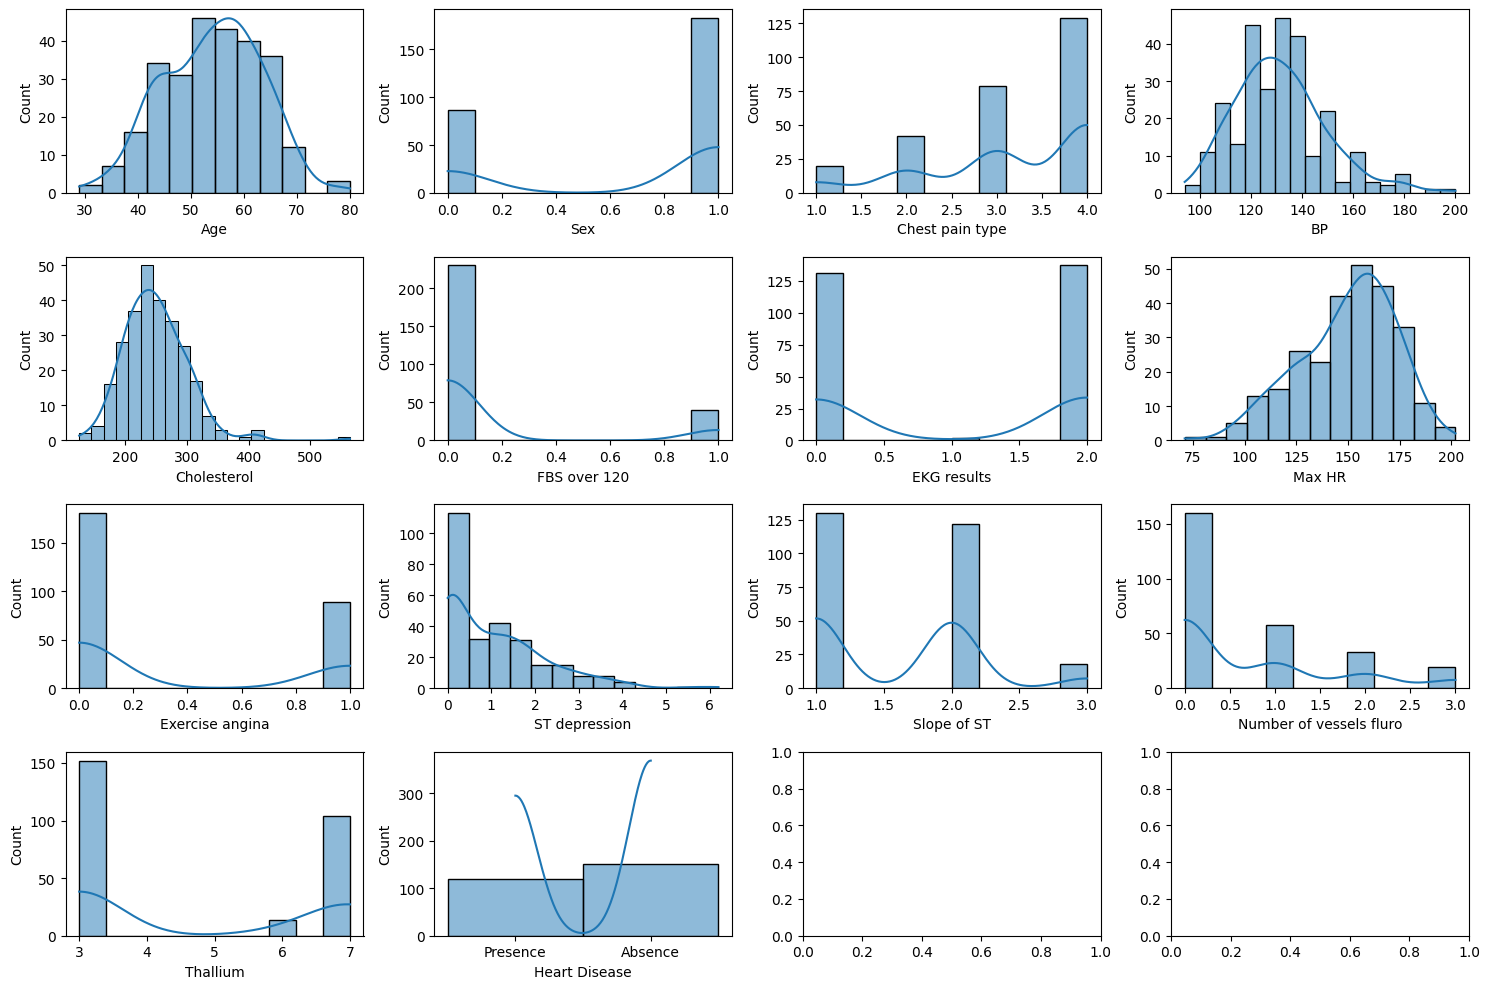

In [7]:
# Plot histograms for each column
df.hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

# Plot histograms using seaborn for better aesthetics
def plot_histograms(dataframe, columns, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
    for i, column in enumerate(columns):
        sns.histplot(dataframe[column], kde=True, ax=axes[i // cols, i % cols])
    plt.tight_layout()
    plt.show()

# Define the columns to plot
columns = df.columns
plot_histograms(df, columns, 4, 4)  # Adjust rows and cols based on number of columns

- **Age**: The age distribution is roughly normal, with a peak around the mid-50s.

- **Cholesterol**: The distribution is right-skewed, with most values concentrated between 200 and 300 mg/dl.

- **BP**: The distribution shows a peak around 120-140 mm Hg, with some higher values indicating patients with hypertension.

- **Max HR**: The maximum heart rate achieved is also roughly normally distributed, with a peak around 150 bpm.

- **ST depression**: This feature is right-skewed, with most values clustered near zero.

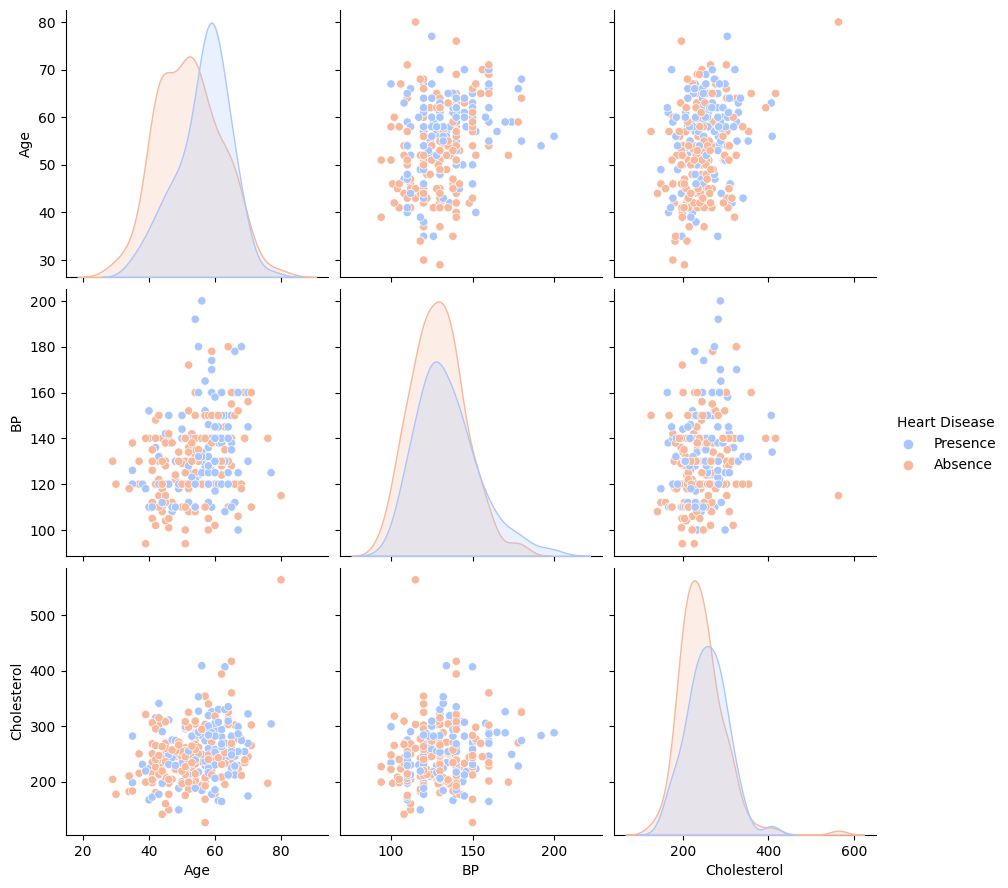

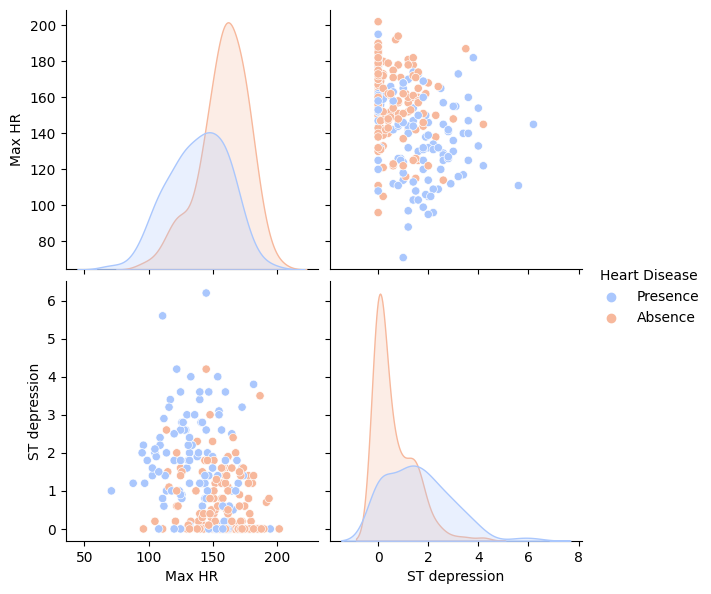

In [8]:
# Group 1
subset_features_group1 = ['Age', 'BP', 'Cholesterol', 'Heart Disease']
sns.pairplot(df[subset_features_group1], hue='Heart Disease', palette='coolwarm', height=3)
plt.show()

# Group 2
subset_features_group2 = ['Max HR', 'ST depression', 'Heart Disease']
sns.pairplot(df[subset_features_group2], hue='Heart Disease', palette='coolwarm', height=3)
plt.show()


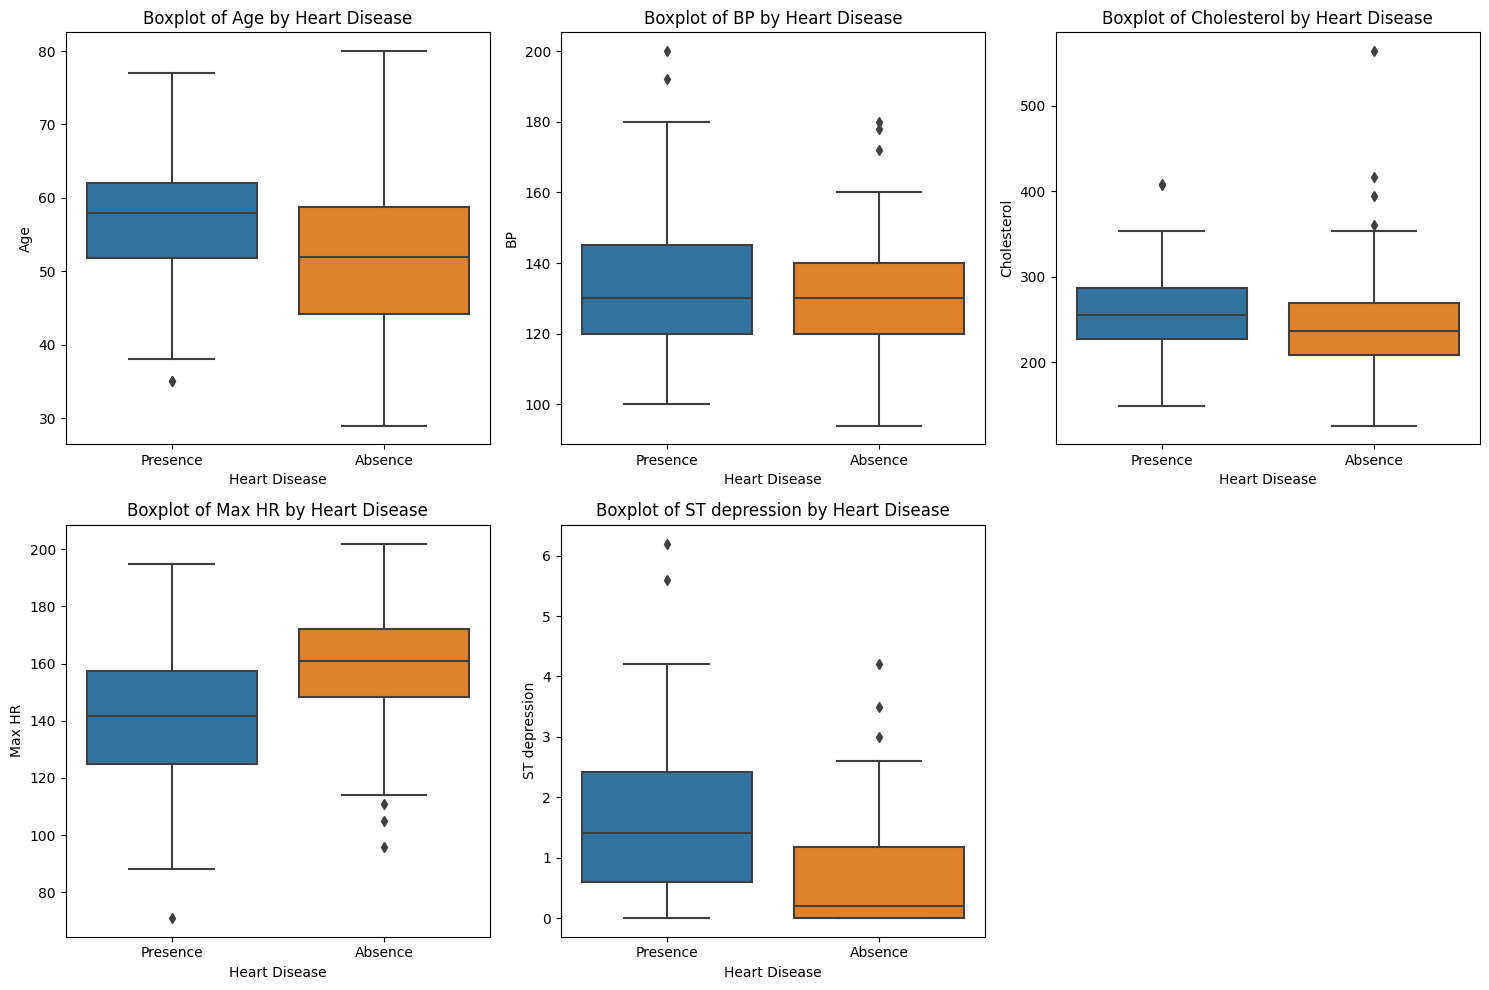

In [9]:
# Boxplots for numerical features in subplots
numerical_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Heart Disease', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Heart Disease')
plt.tight_layout()
plt.show()


- **Age**: Patients with heart disease tend to be older.

- **BP**: Patients with heart disease tend to have higher blood pressure.

- **Cholesterol**: There is a higher variance in cholesterol levels among patients with heart disease.

- **Max HR**: Patients without heart disease tend to have a higher maximum heart rate achieved.

- **ST depression**: Higher values are more common in patients with heart disease, suggesting its importance in the diagnosis.

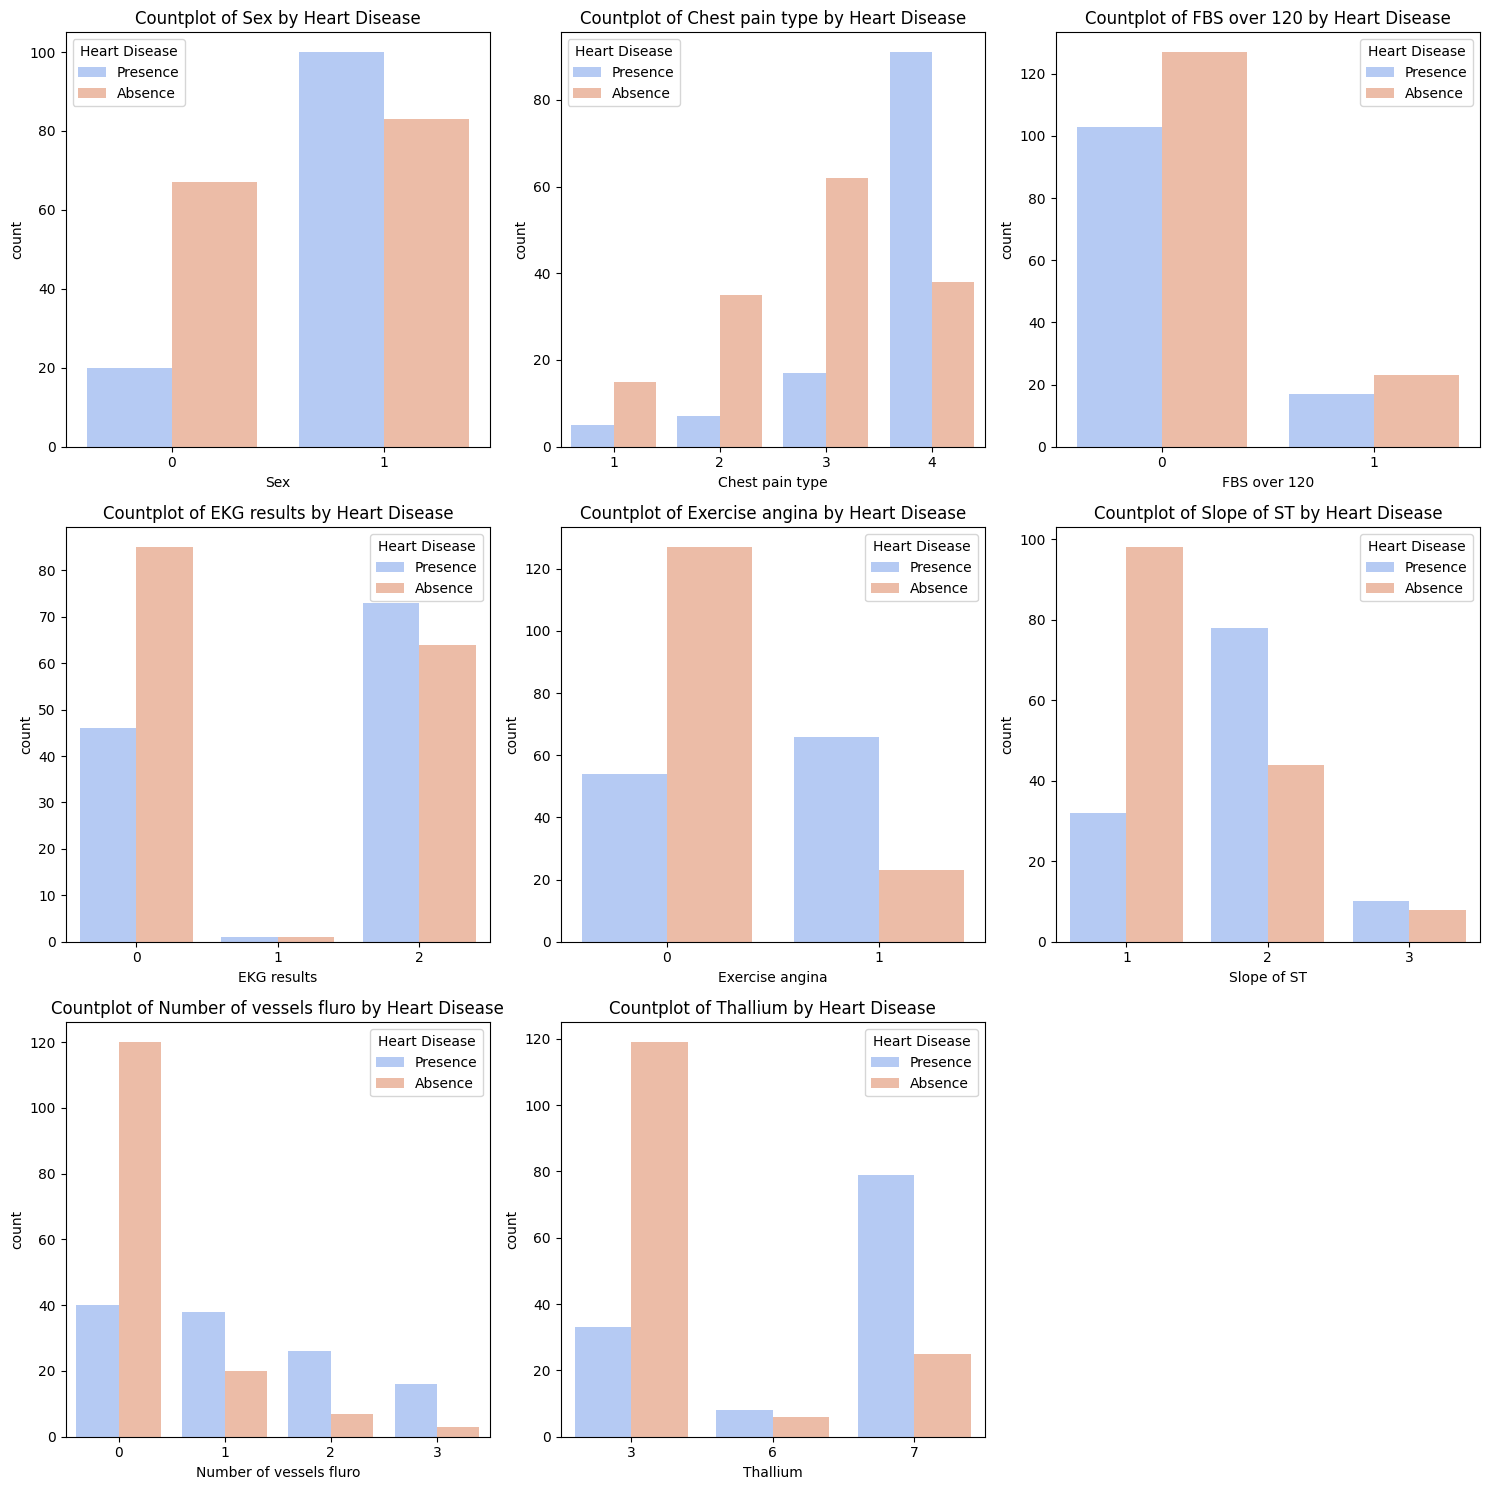

In [10]:
# Barplots for categorical features in subplots
categorical_features = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
                        'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium']
plt.figure(figsize=(15, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='Heart Disease', data=df, palette='coolwarm')
    plt.title(f'Countplot of {feature} by Heart Disease')
plt.tight_layout()
plt.show()


### Summary of Noteworthy Observations

- **Age, BP, Cholesterol, Max HR, and ST depression** show noticeable differences in distributions and box plots between patients with and without heart disease.

- **Sex, Chest pain type, Exercise angina, Number of vessels fluro, and Thallium** categorical features exhibit significant differences in their distribution between the two groups, making them important features for prediction.

- Correlations between some features, such as **ST depression** and **Max HR**, are noteworthy and should be considered when building predictive models.

## Machine Learning Model

### Preprocessing Data

In [11]:
# Convert the target variable to binary
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

# Define the feature columns and the target column
feature_columns = [
    'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 
    'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 
    'Slope of ST', 'Number of vessels fluro', 'Thallium'
]
target_column = 'Heart Disease'

# Split the data into features (X) and target (y)
X = df[feature_columns]
y = df[target_column]

# Define preprocessing steps
numeric_features = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']
categorical_features = [
    'Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 
    'Exercise angina', 'Slope of ST', 'Number of vessels fluro', 'Thallium'
]

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Training and Evaluation

In [12]:
# Create the logistic regression pipeline
logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Evaluate the original model using cross-validation
cv_scores = cross_val_score(logistic_pipeline, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Accuracy (Original Model): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}')

# Train the logistic regression model on the full training set
logistic_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_pipeline.predict(X_test)

# Evaluate the model on the test set
print("Test set accuracy (Original Model): {:.4f}".format(accuracy_score(y_test, y_pred_logistic)))
print(classification_report(y_test, y_pred_logistic))


Cross-Validation Accuracy (Original Model): 0.8593 ± 0.0532
Test set accuracy (Original Model): 0.9444
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.86      0.92        21

    accuracy                           0.94        54
   macro avg       0.96      0.93      0.94        54
weighted avg       0.95      0.94      0.94        54



### Detailed Performance

The classification report provides additional insights into the model's performance:

- **Precision:** The model's precision is high, indicating that it correctly identifies a high proportion of true positive cases among all positive predictions.
- **Recall:** The recall is also strong, showing that the model successfully identifies most actual positive cases.
- **F1-Score:** The F1-score balances precision and recall, confirming the model's robustness.

Overall, the logistic regression model demonstrates excellent predictive capabilities for heart disease, making it a valuable tool for identifying patients at risk.

### Feature Importance

In [13]:
# Get feature names after preprocessing
preprocessor = logistic_pipeline.named_steps['preprocessor']
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Get the coefficients from the logistic regression model
coefficients = logistic_pipeline.named_steps['classifier'].coef_[0]

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficient
importance_df['Abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

print(importance_df)


                      Feature  Coefficient  Abs_Coefficient
10          Chest pain type_4     1.196406         1.196406
21  Number of vessels fluro_0    -1.124372         1.124372
27                 Thallium_7     0.755118         0.755118
23  Number of vessels fluro_2     0.703743         0.703743
6                       Sex_1     0.632193         0.632193
5                       Sex_0    -0.632097         0.632097
7           Chest pain type_1    -0.613735         0.613735
4               ST depression     0.597472         0.597472
9           Chest pain type_3    -0.567296         0.567296
19              Slope of ST_2     0.521186         0.521186
25                 Thallium_3    -0.498207         0.498207
18              Slope of ST_1    -0.441976         0.441976
1                          BP     0.438659         0.438659
22  Number of vessels fluro_1     0.402406         0.402406
26                 Thallium_6    -0.256815         0.256815
2                 Cholesterol     0.2525

### Visualization of Feature Importance

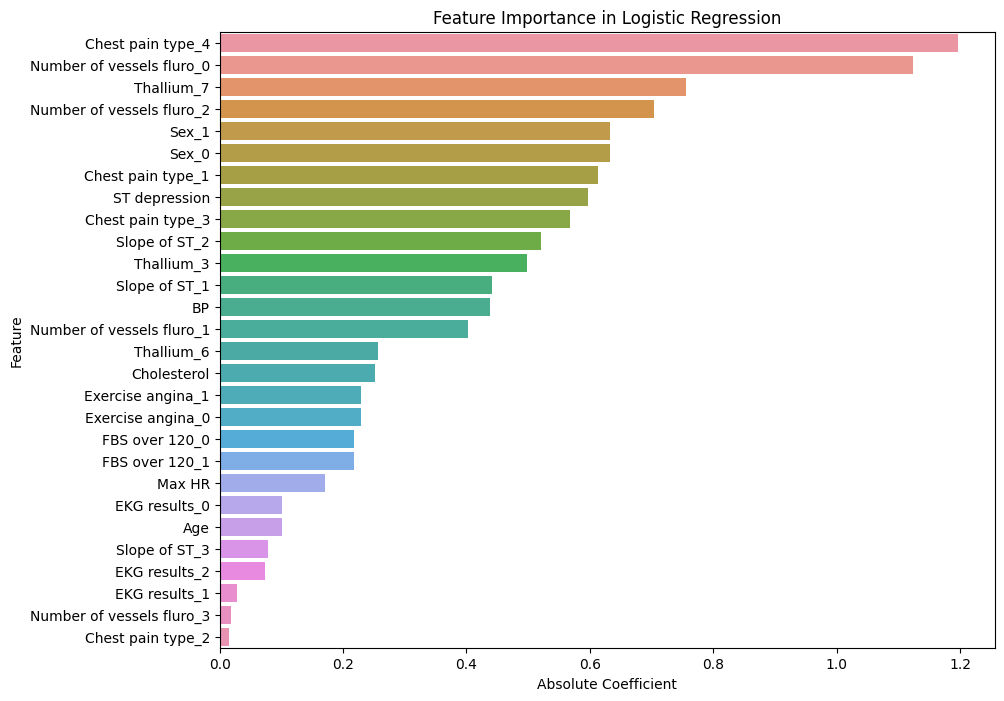

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Abs_Coefficient', y='Feature', data=importance_df)
plt.title('Feature Importance in Logistic Regression')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()


### Top Features

The following are the most important features based on their absolute coefficients:

1. **Chest pain type_4**: Coefficient = 1.196406
2. **Number of vessels fluro_0**: Coefficient = -1.124372
3. **Thallium_7**: Coefficient = 0.755118
4. **Number of vessels fluro_2**: Coefficient = 0.703743
5. **Sex_1**: Coefficient = 0.632193
6. **Sex_0**: Coefficient = -0.632097
7. **Chest pain type_1**: Coefficient = -0.613735
8. **ST depression**: Coefficient = 0.597472
9. **Chest pain type_3**: Coefficient = -0.567296
10. **Slope of ST_2**: Coefficient = 0.521186

This analysis helps identify which medical and demographic factors are most influential in predicting heart disease, enabling more targeted interventions and deeper understanding of cardiovascular health.